# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [43]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [44]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


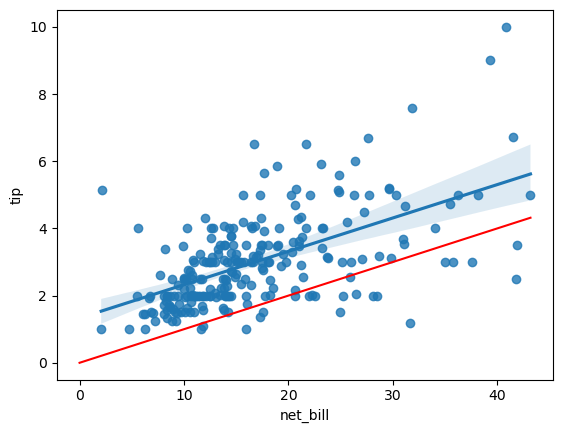

In [45]:
sns.regplot(y = tips['tip'], x = tips['net_bill'], data = tips[tips['tip_pct'] < 0.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1*x

plt.plot(x, y, '-r', label = '10%')

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [46]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.52e-06
Time:                        00:18:34   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

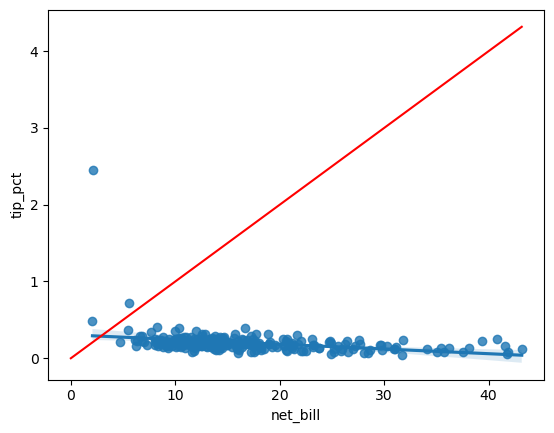

In [47]:
sns.regplot(y = tips['tip_pct'], x = tips['net_bill'], data = tips[tips['tip_pct']<0.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1*x

plt.plot(x, y, '-r', label = '10%')

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [48]:
# Pode-se notar um aumento significativo do valor percentual da gorjeta quando o valor da conta é muito baixo, e também
# uma diminuição no percentual da gorjeta conforme o valor da conta vai aumentando. As pessoas podem achar 10% um valor alto
# demais quando a conta fica muito cara.

# Acredito que os R-quadrados não podem ser comparados diretamente porque as escalas de tip_pct e tip são diferentes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [61]:
# 4.1

pred = reg.predict(tips)
pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [62]:
reg.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [63]:
# 4.2

reg_tip = smf.ols('tip ~ net_bill + tip_pct', data = tips).fit()
pred_tip = reg_tip.predict(tips)
pred_tip

0      2.360495
1      1.957671
2      3.078562
3      3.285872
4      3.398096
         ...   
239    3.986286
240    3.556334
241    3.068089
242    2.548647
243    2.827649
Length: 244, dtype: float64

In [64]:
# 4.3

reg_tip.rsquared

0.5228056660862084

In [65]:
# 4.4

print('R-quadrado tip_pct = ', reg.rsquared)
print('R-quadrado tip = ', reg_tip.rsquared)

R-quadrado tip_pct =  0.09129084920662944
R-quadrado tip =  0.5228056660862084


In [ ]:
# Houve um incremento significativo no R-quadrado quando avaliamos net_bill e tip_pct para predizer tip, em comparação
# ao primeiro caso, onde avaliamos net_bill para predizer tip_pct